In [1]:
# Dependencies

import pandas as pd
import numpy as np
import csv
import import_ipynb as ipynb
from Attendance_Part1 import ATTurlList, yearList, STurlList
%matplotlib notebook
import matplotlib.pyplot as plt

importing Jupyter notebook from Attendance_Part1.ipynb


In [2]:
info = []
x = 0

for i in ATTurlList:
    tables = pd.read_html(i, header=[1])
    df = tables[0]
    A = df[['TEAM','AVG']]
    CSV = pd.read_csv(f'./csv/STdf4{yearList[x]}.csv')
    CSV.rename(columns={'Team': 'TEAM'}, inplace=True)
    dfJ = pd.merge(A,CSV,on='TEAM')
    dfJ['Year']=yearList[x]
    dfJ['SeasonPtsRank'] = dfJ['PTS'].rank()
    info.append(dfJ)
    x+=1

frame = pd.concat(info, axis=0, ignore_index=True)
# frame.to_csv(f'trial.csv', index=False)

In [3]:
frame

,TEAM,AVG,PTS,Year,SeasonPtsRank
0,Montreal,20672,77,2003,10.0
1,Detroit,20058,110,2003,27.0
2,Philadelphia,19325,107,2003,25.0
3,St. Louis,18570,99,2003,22.0
4,Dallas,18532,111,2003,28.0
...,...,...,...,...,...
522,San Jose,12053,48,2022,11.5
523,Winnipeg,11964,48,2022,11.5
524,Arizona,11611,28,2022,2.0
525,Buffalo,8583,38,2022,5.0


In [10]:
frame['AVG'] = pd.to_numeric(frame['AVG'],errors='coerce')
frame['PTS'] = pd.to_numeric(frame['PTS'],errors='coerce')
frame['Year'] = pd.to_numeric(frame['Year'],errors='coerce')
frame['SeasonPtsRank'] = frame['SeasonPtsRank'].apply(np.int64)

frame.dtypes

TEAM             object
AVG               int64
PTS               int64
Year              int64
SeasonPtsRank     int64
dtype: object

In [18]:
def jbReq():
    for i in list(careerList.keys()):
        print(f"{i}: {careerList[i]}")
    global OCC_CHOICE
    OCC_CHOICE = input("Which career field are you looking for information on?  Please input the career ID #: ")
    try:
        careerList[OCC_CHOICE]
        print(f"Valid choice. Good luck in your new venture in {careerList[OCC_CHOICE]}")
    except:
        print("-----------------------------------------------------------------------")
        print("No career found with that ID # please reference the list and try again.")
        print("-----------------------------------------------------------------------")
        jbReq()
#################################################### 
jbReq() #Actually run the function now

NameError: name 'careerList' is not defined

In [17]:
abc = frame.loc[frame['TEAM'] == 'OCC_CHOICE'][:18]
abc

,TEAM,AVG,PTS,Year,SeasonPtsRank


In [12]:
abc["SeasonPtsRank"].mean()

16.22222222222222

<IPython.core.display.Javascript object>


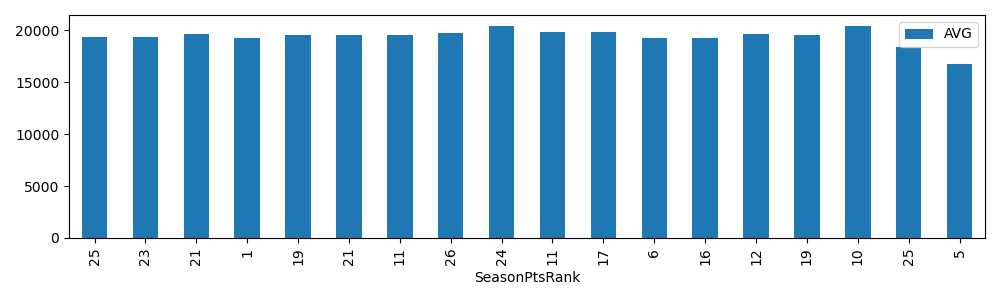

In [13]:
yup = abc[['SeasonPtsRank','AVG']]
yup = yup.set_index('SeasonPtsRank')
yup.plot(kind='bar', figsize=(10,3))
plt.tight_layout()

In [8]:
# # Tells matplotlib that we want to make a scatter plot
# # The size of each point on our plot is determined by their x value
# plt.scatter(philly[0]['points'], philly[0]['avg_att'], marker="o", facecolors="red", edgecolors="black",
#             s=yearList[0], alpha=0.75)

In [9]:
# plt.show()